In [1]:
!pip install tweetnlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other require

# New Section

In [54]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [47]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ml/Twitter_Data_Sample.csv')

# type(df)

In [4]:
data=pd.read_csv("/content/drive/MyDrive/ml/scrapped_tweets.csv")

In [5]:
data

,tweet
0,Balarabe Abbas Lawal a ministerial nominee col...
1,TONTO el que PIENSA que el pueblo es tonto
2,Heel veel anderen ook
3,Canada where truck drivers are Nazis and Nazis...
4,This was a walkthrough a test for What will t...
...,...
148,Arizona Gov Katie Hobbs said this week her adm...
149,Shiv Sena UBT leader Aaditya Thackeray slams B...
150,we PHBN have internal information that they to...
151,General pod Explicit language


In [ ]:
df.head()

In [6]:
import tweetnlp
model = tweetnlp.load_model('sentiment', multilingual=True)

In [ ]:
def func(text):
  dic=model.sentiment(text)
  return dic['label']

In [ ]:
data['type']=[func(each) for each in data['tweet']]

In [ ]:
data

,tweet,type
0,Balarabe Abbas Lawal a ministerial nominee col...,negative
1,TONTO el que PIENSA que el pueblo es tonto,negative
2,Heel veel anderen ook,neutral
3,Canada where truck drivers are Nazis and Nazis...,negative
4,This was a walkthrough a test for What will t...,negative
...,...,...
148,Arizona Gov Katie Hobbs said this week her adm...,negative
149,Shiv Sena UBT leader Aaditya Thackeray slams B...,neutral
150,we PHBN have internal information that they to...,neutral
151,General pod Explicit language,negative


In [ ]:
df['type']=[func(each) for each in df['clean_text']]


In [ ]:
df

In [ ]:
output_path='/content/drive/MyDrive/ml/BERT_results.csv'
df.to_csv(output_path,index=False)

In [ ]:
new_path='/content/drive/MyDrive/ml/scrapped_results.csv'
data.to_csv(new_path)

In [ ]:
results=pd.read_csv('/content/drive/MyDrive/ml/BERT_results.csv')

In [7]:
new_res=pd.read_csv('/content/drive/MyDrive/ml/scrapped_results.csv')

In [8]:
new_res

,Unnamed: 0,tweet,type
0,0,Balarabe Abbas Lawal a ministerial nominee col...,negative
1,1,TONTO el que PIENSA que el pueblo es tonto,negative
2,2,Heel veel anderen ook,neutral
3,3,Canada where truck drivers are Nazis and Nazis...,negative
4,4,This was a walkthrough a test for What will t...,negative
...,...,...,...
148,148,Arizona Gov Katie Hobbs said this week her adm...,negative
149,149,Shiv Sena UBT leader Aaditya Thackeray slams B...,neutral
150,150,we PHBN have internal information that they to...,neutral
151,151,General pod Explicit language,negative


In [9]:
neg=new_res[new_res['type']=='negative']
pos=new_res[new_res['type']=='positive']
neu=new_res[new_res['type']=='neutral']


In [10]:
a=len(neg)
a

56

In [11]:
b=len(pos)
b

9

In [12]:
c=len(neu)
c

88

In [ ]:
a+b+c

153

In [ ]:
len(new_res)

153

In [13]:
f1=a/(a+b+c)
f2=b/(a+b+c)
f3=c/(a+b+c)

In [14]:
f1

0.3660130718954248

In [15]:
f2

0.058823529411764705

In [16]:
f3

0.5751633986928104

In [17]:
lst=[f1,f2,f3]

([<matplotlib.patches.Wedge at 0x7d87ca223c70>,
 [Text(0.44947272741669514, 1.0039792165720351, 'Negative'),
  Text(-0.8709671034441229, 0.6718752151390576, 'Positive'),
  Text(-0.257338789765028, -1.0694749867492324, 'Neutral')],
 [Text(0.24516694222728824, 0.5476250272211101, '36.6%'),
  Text(-0.4750729655149761, 0.3664773900758495, '5.9%'),
  Text(-0.14036661259910618, -0.5833499927723085, '57.5%')])

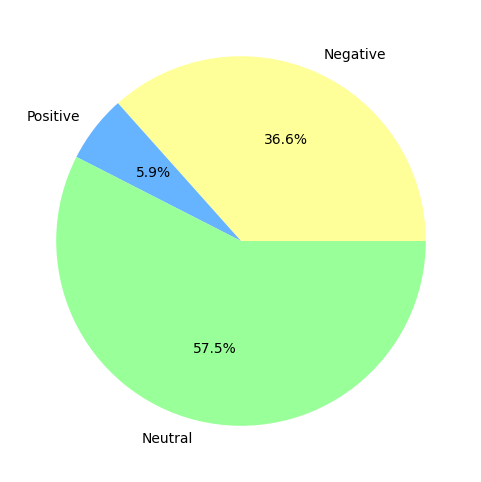

In [18]:
import matplotlib.pyplot as plt
colors = ['#ffff99', '#66b3ff', '#99ff99']
labels = ['Negative','Positive','Neutral']
plt.figure(figsize=(6, 6))
plt.pie(lst,labels=labels,autopct='%1.1f%%', colors=colors)




In [19]:
import copy

In [34]:
stopwordlist = ['a','about','above', 'after', 'again', 'ain', 'all', 'am', 'an', 'also',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'but','can', 'cant',"can\'","cannot", 'd', 'did', 'do','dont', "don\'",
             'does', 'doing', 'down', 'during', 'each','even','few', 'for', 'from',
             'further', 'get','had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma','make','made',
             'me', 'more', 'most','my', 'must','myself', 'now', 'not',"didn\'",'o', 'of', 'on', 'once', 'one',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such', 'still',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they','this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'would','y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves', '➡' ,'✌']

L1=copy.deepcopy(stopwordlist)
L=[word.capitalize() for word in L1]
stopwordlist.extend(L)


STOPWORDS = set(stopwordlist)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [36]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [55]:
words=pd.read_csv('/content/drive/MyDrive/ml/Hate speech words - Sheet1.csv')

In [56]:
words

,Word
0,al
1,anti-Muslim
2,anti-national
3,ass
4,assassin
...,...
132,bribe
133,bribed
134,bribing
135,bribary


In [57]:
L=words.values.tolist()
final=[word[0] for word in L]
L_temp=copy.deepcopy(final)
L_temp=[word.capitalize() for word in final]
final.extend(L_temp)

In [58]:
final

['al',
 'anti-Muslim',
 'anti-national',
 'ass',
 'assassin',
 'assassinated',
 'assassins',
 'bakchod',
 'bakchodi',
 'bhikari',
 'bhosadika',
 'bhosadike',
 'bitch',
 'blast',
 'blasts',
 'bombed',
 'bombs',
 'brandishing',
 'characterless',
 'chutiya',
 'cremate',
 'curse',
 'cursed',
 'cut',
 'darpok',
 'death',
 'die',
 'dirty',
 'disgusting',
 'extremist',
 'fool',
 'fooled',
 'foolish',
 'fraud',
 'frauds',
 'fuck',
 'gareeb',
 'gazwa',
 'gazwaehind',
 'genocide',
 'hang',
 'hanged',
 'harass',
 'harassed',
 'harassment',
 'hindu',
 'hoe',
 'hot-headed',
 'idiot',
 'idiotic',
 'idiots',
 'inshallah',
 'islamic',
 'jain',
 'jammu',
 'jew',
 'jihad',
 'jihadi',
 'jihadis',
 'joker',
 'kafir',
 'kashmir',
 'Khalistani',
 'kill',
 'killed',
 'killer',
 'killers',
 'mad',
 'massacre',
 'minority',
 'mob',
 'modi',
 'murder',
 'murderer',
 'murderers',
 'muslim',
 'naked',
 'pakistan',
 'rape',
 'rapist',
 'rascal',
 'rascals',
 'riot',
 'riots',
 'scam',
 'scammed',
 'scammer',
 'sca

In [59]:
def reason(text):
  text=cleaning_stopwords(text)
  new_text=cleaning_punctuations(text)

  lst=new_text.split(' ')
  temp=copy.deepcopy(lst)
  dump=[]
  j=0
  for i in range(len(lst)):
    word=lst.pop(0)
    sent=model.sentiment(' '.join(lst))
    # print(' '.join(lst),end=' ')
    # print(' '+sent['label'])
    if(sent['label']!='negative'):
      if(j<3):
        dump.append(temp[i])
        j+=1

  for item in L:
    if(item[0] in temp):
      dump.append(item[0])

  if(dump==[]):
    return ' '.join(temp)

  return ' '.join(dump)





In [60]:
new_res['words']=new_res[new_res['type']=='negative']['tweet'].apply(lambda text:reason(text))

In [61]:
new_res['words']=new_res['words'].fillna(' ')

In [62]:
new_res

,Unnamed: 0,tweet,type,words
0,0,Balarabe Abbas Lawal a ministerial nominee col...,negative,collapsed Senate floor
1,1,TONTO el que PIENSA que el pueblo es tonto,negative,TONTO el que PIENSA que el pueblo es tonto
2,2,Heel veel anderen ook,neutral,
3,3,Canada where truck drivers are Nazis and Nazis...,negative,war
4,4,This was a walkthrough a test for What will t...,negative,Panic US Population
...,...,...,...,...
148,148,Arizona Gov Katie Hobbs said this week her adm...,negative,unfettered access dry
149,149,Shiv Sena UBT leader Aaditya Thackeray slams B...,neutral,
150,150,we PHBN have internal information that they to...,neutral,
151,151,General pod Explicit language,negative,Explicit


In [ ]:
model.sentiment('anti national great things hear')

In [ ]:
model.sentiment('Modi fuck you')